##Importing Dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Initial steps

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv_files/House_Rent_Dataset.csv')
df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


In [ ]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [ ]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [ ]:
print(df['Furnishing Status'].unique())
print(df['Area Type'].unique())
print(df['City'].unique() )

['Unfurnished' 'Semi-Furnished' 'Furnished']
['Super Area' 'Carpet Area' 'Built Area']
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']


In [ ]:
df.isna().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [ ]:
df.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


##Data Visualization

<BarContainer object of 4746 artists>

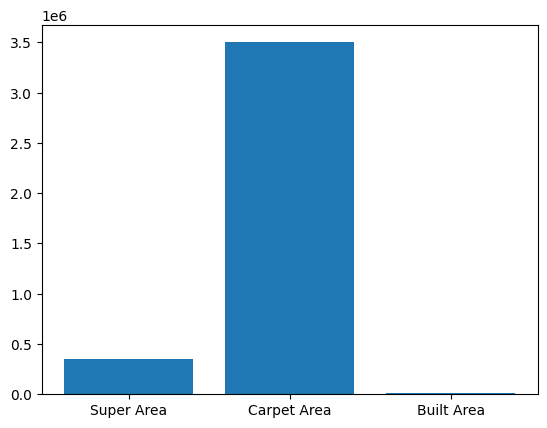

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Area Type'],df['Rent'])

<BarContainer object of 4746 artists>

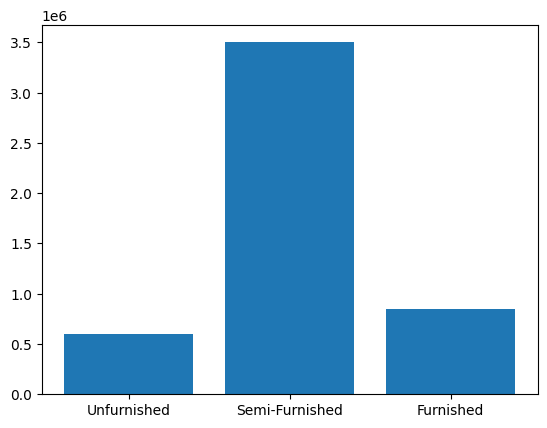

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Furnishing Status'],df['Rent'])

<BarContainer object of 4746 artists>

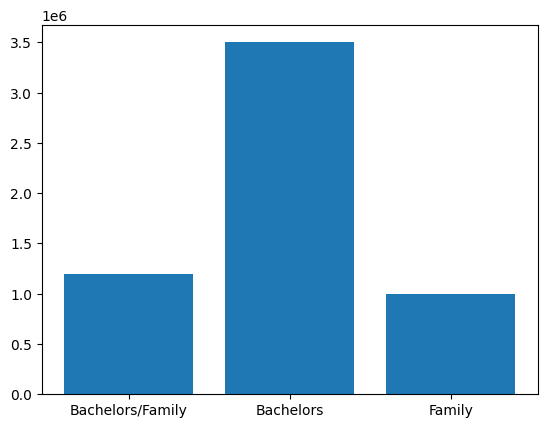

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Tenant Preferred'],df['Rent'])

<BarContainer object of 4746 artists>

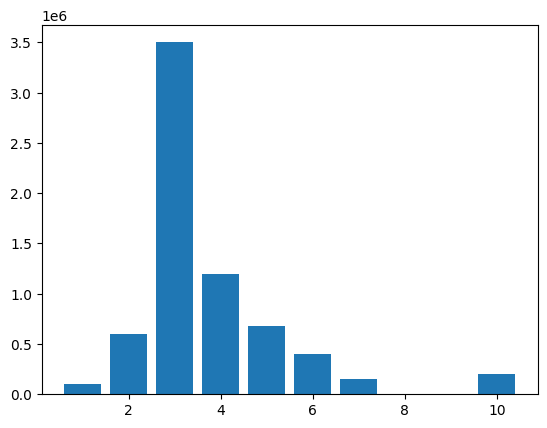

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Bathroom'],df['Rent'])

<BarContainer object of 4746 artists>

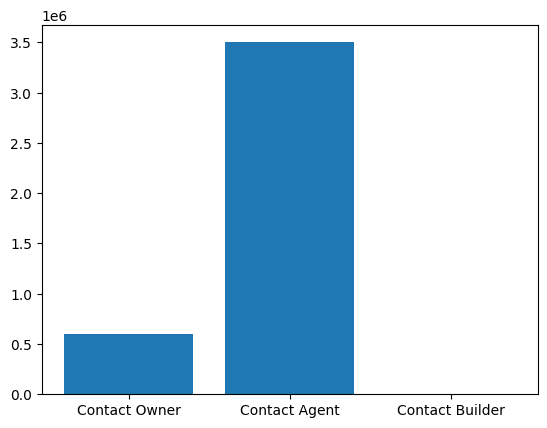

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['Point of Contact'],df['Rent'])

<BarContainer object of 4746 artists>

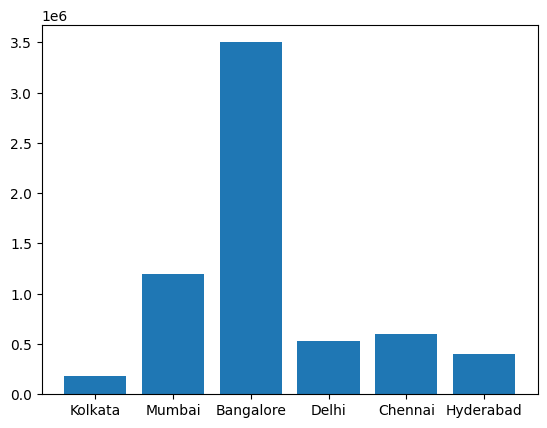

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df['City'],df['Rent'])

##Data Preprocessing

In [ ]:
def get_unique_values(df):
    for column in df.columns:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [ ]:
df.Floor.value_counts()

,count
Floor,
1 out of 2,379
Ground out of 2,350
2 out of 3,312
2 out of 4,308
1 out of 3,293
...,...
11 out of 31,1
50 out of 75,1
18 out of 26,1


In [ ]:
ordinal_map = {'Ground': 1, 'Upper Basement': 2, 'Lower Basement': 0}
def get_ratio_floor(element):
  numerator_denominator = element.split(' out of ')
  if numerator_denominator[0] in ordinal_map.keys():
    ratio = int(ordinal_map[numerator_denominator[0]]) / int(numerator_denominator[1])
  else:
    ratio = int(numerator_denominator[0]) / int(numerator_denominator[1])
  return ratio

In [ ]:
value_to_check = ['3', 'Ground', '1']
rows_with_value = df['Floor'].isin(value_to_check)
df = df[~rows_with_value]
df["Floor"] = df["Floor"].apply(lambda x: get_ratio_floor(x))
df["Floor"].dtypes

dtype('float64')

In [ ]:
get_unique_values(df)

Posted On: ['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_area_type = LabelEncoder()
df['Area Type'] = le_area_type.fit_transform(df['Area Type'])

le_city = LabelEncoder()
df['City'] = le_city.fit_transform(df['City'])

le_furnishing = LabelEncoder()
df['Furnishing Status'] = le_furnishing.fit_transform(df['Furnishing Status'])

le_tenant = LabelEncoder()
df['Tenant Preferred'] = le_tenant.fit_transform(df['Tenant Preferred'])

le_contact = LabelEncoder()
df['Point of Contact'] = le_contact.fit_transform(df['Point of Contact'])
df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,0.5,2,Bandel,4,2,1,2,2


In [ ]:
with open('le_area_type.pkl', 'wb') as f:
    pickle.dump(le_area_type, f)

with open('le_city.pkl', 'wb') as f:
    pickle.dump(le_city, f)

with open('le_furnishing.pkl', 'wb') as f:
    pickle.dump(le_furnishing, f)

with open('le_tenant.pkl', 'wb') as f:
    pickle.dump(le_tenant, f)

with open('le_contact.pkl', 'wb') as f:
    pickle.dump(le_contact, f)


In [ ]:
df['Area Locality'].nunique()

2233

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Area Locality'],dtype=int)],axis=1)
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       ...
       'sra', 'sri sai arcade madinaguda', 'sspdl Mayfair', 'sunanda circal',
       'tollygunge Kabardanga', 'vanamali chs ghatla, Ghatla', 'venkatapuram',
       'venkatesa perumal nagar', 'villvam towers tnhb colony', 'whitefield'],
      dtype='object', length=2245)

In [ ]:
df.drop(columns=['Area Locality'],axis=1,inplace=True)

In [ ]:
df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,...,sra,sri sai arcade madinaguda,sspdl Mayfair,sunanda circal,tollygunge Kabardanga,"vanamali chs ghatla, Ghatla",venkatapuram,venkatesa perumal nagar,villvam towers tnhb colony,whitefield
0,2022-05-18,2,10000,1100,0.5,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(4742, 2244)

In [ ]:
#outliers removal
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Rent','Size']]))
df = df[(z_scores < 1).all(axis=1)]
df

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,...,sra,sri sai arcade madinaguda,sspdl Mayfair,sunanda circal,tollygunge Kabardanga,"vanamali chs ghatla, Ghatla",venkatapuram,venkatesa perumal nagar,villvam towers tnhb colony,whitefield
0,2022-05-18,2,10000,1100,0.500000,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
1,2022-05-13,2,20000,800,0.333333,2,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2022-05-16,2,17000,1000,0.333333,2,4,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,2022-07-04,2,10000,800,0.500000,2,4,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2022-05-09,2,7500,850,0.500000,1,4,2,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2022-07-06,2,25000,1040,0.500000,1,3,2,0,2,...,0,0,0,0,0,0,0,0,0,0
4740,2022-06-02,2,12000,1350,1.000000,2,3,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4741,2022-05-18,2,15000,1000,0.600000,1,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
4744,2022-07-06,3,45000,1500,0.676471,1,3,1,2,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(1)

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,...,sra,sri sai arcade madinaguda,sspdl Mayfair,sunanda circal,tollygunge Kabardanga,"vanamali chs ghatla, Ghatla",venkatapuram,venkatesa perumal nagar,villvam towers tnhb colony,whitefield
0,2022-05-18,2,10000,1100,0.5,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(3713, 2244)

In [ ]:
df.drop(['Posted On'],inplace=True,axis=1)

In [ ]:
print(df.columns)

Index(['BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       ...
       'sra', 'sri sai arcade madinaguda', 'sspdl Mayfair', 'sunanda circal',
       'tollygunge Kabardanga', 'vanamali chs ghatla, Ghatla', 'venkatapuram',
       'venkatesa perumal nagar', 'villvam towers tnhb colony', 'whitefield'],
      dtype='object', length=2243)


##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Rent'],axis=1)
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

##Finding Best Model using Grid Search CV

##Random Forest Regressor

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
RFR = RandomForestRegressor()
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
rfr_best_model = grid_search.best_estimator_
y_pred = rfr_best_model.predict(X_test)
print("Best model score:", rfr_best_model.score(X_train, y_train))
print("Best model score:", rfr_best_model.score(X_test, y_test))

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 0.9670521129053626
Best model score: 0.7972921819596641


##Decision Tree Regressor

In [ ]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
RFR = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
dtr_best_model = grid_search.best_estimator_
y_pred = dtr_best_model.predict(X_test)
print("Best model score:", dtr_best_model.score(X_train, y_train))
print("Best model score:", dtr_best_model.score(X_test, y_test))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best model score: 0.8942008627511853
Best model score: 0.7693998432492448


##Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
rr_best_model = grid_search.best_estimator_
y_pred = rr_best_model.predict(X_test)
print("Best model score:", rr_best_model.score(X_train, y_train))
print("Best model score:", rr_best_model.score(X_test, y_test))

Best hyperparameters: {'alpha': 1.0}
Best model score: 0.8694024360486821
Best model score: 0.6661491426640329


##Lasso Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso = Lasso(fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
lr_best_model = grid_search.best_estimator_
y_pred = lr_best_model.predict(X_test)
print("Best model score:", lr_best_model.score(X_train, y_train))
print("Best model score:", lr_best_model.score(X_test, y_test))

Best hyperparameters: {'alpha': 10.0}
Best model score: 0.7249812903018189
Best model score: 0.6202544604065805


##Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid={'n_estimators':[100,500],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4],
            'min_samples_leaf':[3],
            'max_features':[1.0]
             }
RFR = GradientBoostingRegressor()
grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
gbr_best_model = grid_search.best_estimator_
y_pred = gbr_best_model.predict(X_test)
print("Best model score:", gbr_best_model.score(X_train, y_train))
print("Best model score:", gbr_best_model.score(X_test, y_test))

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 500}
Best model score: 0.856288064388154
Best model score: 0.8041988706010547


##KNeighbors Regressor

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsRegressor()
grid_search=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
kng_best_model = grid_search.best_estimator_
y_pred = kng_best_model.predict(X_test)
print("Best model score:", kng_best_model.score(X_train, y_train))
print("Best model score:", kng_best_model.score(X_test, y_test))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best hyperparameters: {'n_neighbors': 4}
Best model score: 0.7262277796943369
Best model score: 0.5853111325234728


In [ ]:
from sklearn.model_selection import cross_val_score
#random forest regressor cross_val_score
rf_scores = cross_val_score(rfr_best_model, X_train, y_train, cv=5)
rfr_mean_Score = rf_scores.mean()
print("Random Forest Regressor Cross-Validation Scores:", rfr_mean_Score)
#KNeighbors Regressor cross_val_score
knn_scores = cross_val_score(kng_best_model, X_train, y_train, cv=5)
kng_mean_Score = knn_scores.mean()
print("KNeighbors Regressor Cross-Validation Scores:", kng_mean_Score)
#Decision Tree Regressor cross_val_score
dt_scores = cross_val_score(dtr_best_model, X_train, y_train, cv=5)
dtr_mean_Score = dt_scores.mean()
print("Decision Tree Regressor Cross-Validation Scores:", dtr_mean_Score)
#Ridge Regression cross_val_score
rr_scores = cross_val_score(rr_best_model, X_train, y_train, cv=5)
rr_mean_Score = rr_scores.mean()
print("Ridge Regression Cross-Validation Scores:", rr_mean_Score)
#Lasso Regression cross_val_score
lr_scores = cross_val_score(lr_best_model, X_train, y_train, cv=5)
lr_mean_Score = lr_scores.mean()
print("Lasso Regression Cross-Validation Scores:", lr_mean_Score)
#Gradient Boosting Regressor cross_val_score
gbr_scores = cross_val_score(gbr_best_model, X_train, y_train, cv=5)
gbr_mean_Score = gbr_scores.mean()
print("Gradient Boosting Regressor Cross-Validation Scores:", gbr_mean_Score)

Random Forest Regressor Cross-Validation Scores: 0.763285069853378
KNeighbors Regressor Cross-Validation Scores: 0.5021200717929217
Decision Tree Regressor Cross-Validation Scores: 0.7090834510916677
Ridge Regression Cross-Validation Scores: 0.6518580862093015
Lasso Regression Cross-Validation Scores: 0.6128368570610438
Gradient Boosting Regressor Cross-Validation Scores: 0.777726543464686


In [ ]:
from sklearn.model_selection import cross_val_score
#random forest regressor cross_val_score
rf_scores = cross_val_score(rfr_best_model, X_test, y_test, cv=5)
rfr_mean_Score = rf_scores.mean()
print("Random Forest Regressor Cross-Validation Scores:", rfr_mean_Score)
#KNeighbors Regressor cross_val_score
knn_scores = cross_val_score(kng_best_model, X_test, y_test, cv=5)
kng_mean_Score = knn_scores.mean()
print("KNeighbors Regressor Cross-Validation Scores:", kng_mean_Score)
#Decision Tree Regressor cross_val_score
dt_scores = cross_val_score(dtr_best_model, X_test, y_test, cv=5)
dtr_mean_Score = dt_scores.mean()
print("Decision Tree Regressor Cross-Validation Scores:", dtr_mean_Score)
#Ridge Regression cross_val_score
rr_scores = cross_val_score(rr_best_model, X_test, y_test, cv=5)
rr_mean_Score = rr_scores.mean()
print("Ridge Regression Cross-Validation Scores:", rr_mean_Score)
#Lasso Regression cross_val_score
lr_scores = cross_val_score(lr_best_model, X_test, y_test, cv=5)
lr_mean_Score = lr_scores.mean()
print("Lasso Regression Cross-Validation Scores:", lr_mean_Score)
#Gradient Boosting Regressor cross_val_score
gbr_scores = cross_val_score(gbr_best_model, X_test, y_test, cv=5)
gbr_mean_Score = gbr_scores.mean()
print("Gradient Boosting Regressor Cross-Validation Scores:", gbr_mean_Score)

Random Forest Regressor Cross-Validation Scores: 0.7487779212978292
KNeighbors Regressor Cross-Validation Scores: 0.2951935376763025
Decision Tree Regressor Cross-Validation Scores: 0.6817455829164096
Ridge Regression Cross-Validation Scores: 0.59606823015059
Lasso Regression Cross-Validation Scores: 0.5572081307132614
Gradient Boosting Regressor Cross-Validation Scores: 0.717802005933338


In [ ]:
#mean_squared_error, mean_absolute_error, r2_score for rfr_best_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rfr_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
#mean_squared_error, mean_absolute_error, r2_score for gbr_best_model
y_pred = gbr_best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 87037397.07042569
Mean Absolute Error: 5576.288257813669
R-squared: 0.7970567112495435
Mean Squared Error: 83974300.16662951
Mean Absolute Error: 5602.622901476047
R-squared: 0.8041988706010547


#Random Forest Regressor shows high accuracy in camparision with other models

In [ ]:
# label encoder reverse transform
df['Area Type'] = le_area_type.inverse_transform(df['Area Type'].astype(int))
df['City'] = le_city.inverse_transform(df['City'].astype(int))
df['Furnishing Status'] = le_furnishing.inverse_transform(df['Furnishing Status'].astype(int))
df['Tenant Preferred'] = le_tenant.inverse_transform(df['Tenant Preferred'].astype(int))
df['Point of Contact'] = le_contact.inverse_transform(df['Point of Contact'].astype(int))
df

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,...,sra,sri sai arcade madinaguda,sspdl Mayfair,sunanda circal,tollygunge Kabardanga,"vanamali chs ghatla, Ghatla",venkatapuram,venkatesa perumal nagar,villvam towers tnhb colony,whitefield
0,2,10000,1100,0.500000,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,0.333333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
2,2,17000,1000,0.333333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
3,2,10000,800,0.500000,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,0.500000,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,2,25000,1040,0.500000,Carpet Area,Hyderabad,Unfurnished,Bachelors,2,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
4740,2,12000,1350,1.000000,Super Area,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
4741,2,15000,1000,0.600000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,...,0,0,0,0,0,0,0,0,0,0
4744,3,45000,1500,0.676471,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pickle
with open('home_rent_best_model.pkl', 'wb') as f:
    pickle.dump(rfr_best_model, f)

NameError: name 'df' is not defined

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))